## Help from:


[github ->areed1192](https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-finance/sec-web-scraping/Web%20Scraping%20SEC%20-%2010K%20Landing%20Page%20-%20Single.ipynb)

[youtube](https://www.youtube.com/watch?v=4zE9HjPIqC4&t=1075s)

In [36]:
#PDF
import PyPDF2
#import re
import pandas as pd
import glob
from tabula import read_pdf
import numpy as np
import openpyxl
import fitz
import os
import bs4 as bs
#Selenium
#import selenium
#from selenium import webdriver
import json
import shutil
import pdfkit
import wkhtmltopdf
import requests
import matplotlib.pyplot as plt

In [2]:
co = pd.read_csv('tempURL.csv')
co.head()

,ticker,url_10k,new_url
0,PEP,https://www.sec.gov/Archives/edgar/data/77476/...,https://www.sec.gov/Archives/edgar/data/77476/...
1,ORLY,https://www.sec.gov/Archives/edgar/data/898173...,https://www.sec.gov/Archives/edgar/data/898173...
2,KO,https://www.sec.gov/Archives/edgar/data/317540...,https://www.sec.gov/Archives/edgar/data/317540...
3,BKR,https://www.sec.gov/Archives/edgar/data/170160...,https://www.sec.gov/Archives/edgar/data/170160...
4,SHLDQ,https://www.sec.gov/Archives/edgar/data/131006...,https://www.sec.gov/Archives/edgar/data/131006...


## Create Dictionary of 'co'

Dictionary contains ticker name, with corresponding Edgar folder

In [3]:
def ticker_url(tick_col, url_col):
    co_dict = {}
    for k,v in zip(tick_col,url_col):
        co_dict[k] = v
    return co_dict
#ticker_url(co['ticker'],co['url_10k'])

In [4]:
#add filing summary to look at relevant tables
co_info = ticker_url(co['ticker'],co['new_url']+'/FilingSummary.xml') 

In [5]:
co_info

{'PEP': 'https://www.sec.gov/Archives/edgar/data/77476/000007747617000010/FilingSummary.xml',
 'ORLY': 'https://www.sec.gov/Archives/edgar/data/898173/000089817317000091/FilingSummary.xml',
 'KO': 'https://www.sec.gov/Archives/edgar/data/317540/000156459017004316/FilingSummary.xml',
 'BKR': 'https://www.sec.gov/Archives/edgar/data/1701605/000170160518000029/FilingSummary.xml',
 'SHLDQ': 'https://www.sec.gov/Archives/edgar/data/1310067/000131006717000005/FilingSummary.xml',
 'AZO': 'https://www.sec.gov/Archives/edgar/data/866787/000119312517319357/FilingSummary.xml',
 'SYY': 'https://www.sec.gov/Archives/edgar/data/96021/000009602117000120/FilingSummary.xml',
 'AAP': 'https://www.sec.gov/Archives/edgar/data/1158449/000115844917000034/FilingSummary.xml',
 'ARMK': 'https://www.sec.gov/Archives/edgar/data/1584509/000158450917000247/FilingSummary.xml',
 'HAL': 'https://www.sec.gov/Archives/edgar/data/45012/000004501217000047/FilingSummary.xml',
 'WMT': 'https://www.sec.gov/Archives/edgar/da

## Get list of Keys
So can reference in later function

In [6]:
def keyList(dictionary):
    key_lst = []
    for k in dictionary.keys():
        key_lst.append(k)
    return key_lst
key_list = keyList(co_info)

In [7]:
#make smaller list to see if code working
smpl_lst = ['PEP','ORLY','KO','BKR','SHLDQ','AZO','SYY','AAP','ARMK','HAL','WMT','TSN','ARG','GPC','USFD','KMI','LKQ','NOV','LOW','COP','GT','GS','MON','MAS','BBY','SHW','PX','CHK','PFGC','ABS','MPC','WY','HD','ITW','KO','HD','KR','VLO','DVN','HON','NGL','EPD','VRTV','SPLS','BLDR','PAGP','DE','APA','SHW','BA','MDLZ','APD','MCK','ADM','UNFI','UNVR','K','CORE','WBA','TRGP','PPG','F','KO','COST','ODP','MHK','SPTN','DD','XOM','CVS','GM','ABC','AMZN','GE','CAH','CVX','PSX','JNJ','PG','TGT','DELL','INTC','UTX','PFE','LMT','HPE','CSCO','PEAK','DOW','MRK','CAT','ORCL','TJX','NKE','EXC','GD','RAD','MMM','INT','PM','KHC','AVT','M','ABBV','MCD','NOC','RTN','ANDV','ARW','AMGN','DG','AN','SBUX','LLY','IP','ABT','DLTR','WHR','EMR','BMY','MO','KSS','LEA','JBL','TMO','KMB','SVU','CMI','XRX','PCAR','GIS','IEP','PBF','KMX','FCX','WFM','GPS','CL','JWN','WRK','CAG','CDW','TXT','TXN','NWL','WDC','ROST','LB','JCP','RAI','BDX','MU','ARNC','VFC','BBBY','HSIC','TOY','BIIB','SWK','PH','SYK','EL','CELG','GPI','AMAT','HFC','OXY','X','BAX','GWW','ALV','SAH','OMI','HUN','MUSA','HRL','GLW','AA','BLL','CST','EMN','EBAY','OKE','LAD','RS','TEN','BSX','NEM','CCK','GLP','PVH','NAV','CPB','DKS','APC','SJM','STLD','FL','WNR','ZBH','AXE','LHX','DGX','HSY','AGCO','RL','WCC','MOS','HII','TSLA','ASNA','DRI','HAR','NVDA','DOV','SPR','AMRK','TSCO','SEE','YUMC','OI','STZ','ABG','BERY','SANM','DDS','YUM','CASY','APH','OSK','THS','AVY','HBI','MSI','LRCX','AKS','ROK','AVP','TEX','DHR','PKG','CLX','INGR','OC','BURL','PDCO','OLN','TA','MAT','CC','CE','SEB','ESND','COL','BIG','MIK']

## Gert financial Statement URL

In [8]:
all_tbl = []

for k,v in co_info.items():
    main_folder = v.replace('FilingSumarry.xml','')
    try:
        r = requests.get(v).content
        soup = bs.BeautifulSoup(r, 'lxml') 
        
        filings = soup.find('myreports') #all financial filings  submitted to SEC
        #print(filings) # check to see if works
        for filing in filings.find_all('report')[:-1]: #[:-1] helps last report work
    
            filing_dict = {}
            filing_dict['shortname'] = filing.shortname.text
            filing_dict['longname'] = filing.longname.text
            filing_dict['position'] = filing.position.text
            filing_dict['category'] = filing.menucategory.text
            filing_dict['url'] = main_folder + filing.htmlfilename.text
            filing_dict['ticker'] = k
            #append dict to list 
            all_tbl.append(filing_dict)
            
            #user relevant information
            if filing.menucategory.text =='Statements': #narrow down to financial statements
                print('-'*100)
                print(filing_dict['ticker']) # see which company you are looking at
                print(filing_dict['url'].replace('FilingSummary.xml',''))
                print(filing.longname.text)
                print(filing.shortname.text)
                print(filing.menucategory.text)
                print(filing.position.text)
    except:
        print (k, ' Data not found')

----------------------------------------------------------------------------------------------------
PEP
https://www.sec.gov/Archives/edgar/data/77476/000007747617000010/R2.htm
1001000 - Statement - Consolidated Statement of Income
Consolidated Statement of Income
Statements
2
----------------------------------------------------------------------------------------------------
PEP
https://www.sec.gov/Archives/edgar/data/77476/000007747617000010/R3.htm
1002000 - Statement - Consolidated Statement of Comprehensive Income
Consolidated Statement of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
PEP
https://www.sec.gov/Archives/edgar/data/77476/000007747617000010/R4.htm
1003000 - Statement - Consolidated Statement of Cash Flows
Consolidated Statement of Cash Flows
Statements
4
----------------------------------------------------------------------------------------------------
PEP
https://www.sec.gov/Archi

----------------------------------------------------------------------------------------------------
AZO
https://www.sec.gov/Archives/edgar/data/866787/000119312517319357/R2.htm
103 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
2
----------------------------------------------------------------------------------------------------
AZO
https://www.sec.gov/Archives/edgar/data/866787/000119312517319357/R3.htm
104 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
AZO
https://www.sec.gov/Archives/edgar/data/866787/000119312517319357/R4.htm
105 - Statement - Consolidated Statements of Comprehensive Income (Parenthetical)
Consolidated Statements of Comprehensive Income (Parenthetical)
Statements
4
---------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
WMT
https://www.sec.gov/Archives/edgar/data/104169/000010416917000021/R2.htm
1001000 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
2
----------------------------------------------------------------------------------------------------
WMT
https://www.sec.gov/Archives/edgar/data/104169/000010416917000021/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
WMT
https://www.sec.gov/Archives/edgar/data/104169/000010416917000021/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
WMT
https://www.sec.gov/Archives/edgar/d

----------------------------------------------------------------------------------------------------
KMI
https://www.sec.gov/Archives/edgar/data/1506307/000150630717000008/R2.htm
1001000 - Statement - CONSOLIDATED STATEMENTS OF INCOME
CONSOLIDATED STATEMENTS OF INCOME
Statements
2
----------------------------------------------------------------------------------------------------
KMI
https://www.sec.gov/Archives/edgar/data/1506307/000150630717000008/R3.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
Statements
3
----------------------------------------------------------------------------------------------------
KMI
https://www.sec.gov/Archives/edgar/data/1506307/000150630717000008/R4.htm
1002501 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME, TAX (Parenthetical)
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME, TAX (Parenthetical)
Statements
4
--------------------------------------------------------

----------------------------------------------------------------------------------------------------
COP
https://www.sec.gov/Archives/edgar/data/1163165/000119312517050077/R2.htm
000110 - Statement - Consolidated Income Statement
Consolidated Income Statement
Statements
2
----------------------------------------------------------------------------------------------------
COP
https://www.sec.gov/Archives/edgar/data/1163165/000119312517050077/R3.htm
000111 - Statement - Consolidated Income Statement (Parenthetical)
Consolidated Income Statement (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
COP
https://www.sec.gov/Archives/edgar/data/1163165/000119312517050077/R4.htm
000120 - Statement - Consolidated Statement of Comprehensive Income
Consolidated Statement of Comprehensive Income
Statements
4
----------------------------------------------------------------------------------------------------
COP
https://ww

----------------------------------------------------------------------------------------------------
BBY
https://www.sec.gov/Archives/edgar/data/764478/000076447817000008/R2.htm
1001000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
2
----------------------------------------------------------------------------------------------------
BBY
https://www.sec.gov/Archives/edgar/data/764478/000076447817000008/R3.htm
1001501 - Statement - CONSOLIDATED BALANCE SHEETS (PARENTHETICAL)
CONSOLIDATED BALANCE SHEETS (PARENTHETICAL)
Statements
3
----------------------------------------------------------------------------------------------------
BBY
https://www.sec.gov/Archives/edgar/data/764478/000076447817000008/R4.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF EARNINGS
CONSOLIDATED STATEMENTS OF EARNINGS
Statements
4
----------------------------------------------------------------------------------------------------
BBY
https://www.sec.gov/Archives/edgar/data/

----------------------------------------------------------------------------------------------------
ABS
https://www.sec.gov/Archives/edgar/data/1646972/000164697218000017/R2.htm
1001000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
2
----------------------------------------------------------------------------------------------------
ABS
https://www.sec.gov/Archives/edgar/data/1646972/000164697218000017/R3.htm
1001001 - Statement - Consolidated Balance Sheets (Parenthetical)
Consolidated Balance Sheets (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
ABS
https://www.sec.gov/Archives/edgar/data/1646972/000164697218000017/R4.htm
1002000 - Statement - Consolidated Statements of Operations and Comprehensive Income (Loss)
Consolidated Statements of Operations and Comprehensive Income (Loss)
Statements
4
--------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
ITW
https://www.sec.gov/Archives/edgar/data/49826/000004982617000022/R2.htm
1001000 - Statement - Statement of Income
Statement of Income
Statements
2
----------------------------------------------------------------------------------------------------
ITW
https://www.sec.gov/Archives/edgar/data/49826/000004982617000022/R3.htm
1002000 - Statement - Statement of Comprehensive Income
Statement of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
ITW
https://www.sec.gov/Archives/edgar/data/49826/000004982617000022/R4.htm
1004000 - Statement - Statement of Financial Position
Statement of Financial Position
Statements
4
----------------------------------------------------------------------------------------------------
ITW
https://www.sec.gov/Archives/edgar/data/49826/000004982617000022/R5.htm
1004001 - State

----------------------------------------------------------------------------------------------------
EPD
https://www.sec.gov/Archives/edgar/data/1061219/000106121917000008/R2.htm
010000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
2
----------------------------------------------------------------------------------------------------
EPD
https://www.sec.gov/Archives/edgar/data/1061219/000106121917000008/R3.htm
010100 - Statement - CONSOLIDATED BALANCE SHEETS (Parenthetical)
CONSOLIDATED BALANCE SHEETS (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
EPD
https://www.sec.gov/Archives/edgar/data/1061219/000106121917000008/R4.htm
020000 - Statement - STATEMENTS OF CONSOLIDATED OPERATIONS
STATEMENTS OF CONSOLIDATED OPERATIONS
Statements
4
----------------------------------------------------------------------------------------------------
EPD
https://www.sec.gov/Archives/edgar/d

----------------------------------------------------------------------------------------------------
APA
https://www.sec.gov/Archives/edgar/data/6769/000167337917000004/R2.htm
1001000 - Statement - Statement of Consolidated Operations
Statement of Consolidated Operations
Statements
2
----------------------------------------------------------------------------------------------------
APA
https://www.sec.gov/Archives/edgar/data/6769/000167337917000004/R3.htm
1002000 - Statement - Statement of Consolidated Comprehensive Income (Loss)
Statement of Consolidated Comprehensive Income (Loss)
Statements
3
----------------------------------------------------------------------------------------------------
APA
https://www.sec.gov/Archives/edgar/data/6769/000167337917000004/R4.htm
1003000 - Statement - Statement of Consolidated Cash Flows
Statement of Consolidated Cash Flows
Statements
4
----------------------------------------------------------------------------------------------------
APA
https:

----------------------------------------------------------------------------------------------------
MCK
https://www.sec.gov/Archives/edgar/data/927653/000092765317000007/R2.htm
1001000 - Statement - CONSOLIDATED STATEMENTS OF OPERATIONS
CONSOLIDATED STATEMENTS OF OPERATIONS
Statements
2
----------------------------------------------------------------------------------------------------
MCK
https://www.sec.gov/Archives/edgar/data/927653/000092765317000007/R3.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
Statements
3
----------------------------------------------------------------------------------------------------
MCK
https://www.sec.gov/Archives/edgar/data/927653/000092765317000007/R4.htm
1003000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
4
----------------------------------------------------------------------------------------------------
MCK
https://www.sec.gov/Archives

----------------------------------------------------------------------------------------------------
CORE
https://www.sec.gov/Archives/edgar/data/1318084/000131808417000007/R2.htm
1001000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
2
----------------------------------------------------------------------------------------------------
CORE
https://www.sec.gov/Archives/edgar/data/1318084/000131808417000007/R3.htm
1001501 - Statement - Consolidated Balance Sheets (Parentheticals)
Consolidated Balance Sheets (Parentheticals)
Statements
3
----------------------------------------------------------------------------------------------------
CORE
https://www.sec.gov/Archives/edgar/data/1318084/000131808417000007/R4.htm
1002000 - Statement - Consolidated Statements of Operations
Consolidated Statements of Operations
Statements
4
----------------------------------------------------------------------------------------------------
CORE
https://www.sec.gov/Archive

----------------------------------------------------------------------------------------------------
COST
https://www.sec.gov/Archives/edgar/data/909832/000090983217000014/R2.htm
1001000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
2
----------------------------------------------------------------------------------------------------
COST
https://www.sec.gov/Archives/edgar/data/909832/000090983217000014/R3.htm
1001501 - Statement - Consolidated Balance Sheets (Parenthetical)
Consolidated Balance Sheets (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
COST
https://www.sec.gov/Archives/edgar/data/909832/000090983217000014/R4.htm
1002000 - Statement - Consolidated Statements Of Income
Consolidated Statements Of Income
Statements
4
----------------------------------------------------------------------------------------------------
COST
https://www.sec.gov/Archives/edgar/data/

----------------------------------------------------------------------------------------------------
CVS
https://www.sec.gov/Archives/edgar/data/64803/000006480317000006/R2.htm
1001000 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
2
----------------------------------------------------------------------------------------------------
CVS
https://www.sec.gov/Archives/edgar/data/64803/000006480317000006/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
CVS
https://www.sec.gov/Archives/edgar/data/64803/000006480317000006/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
CVS
https://www.sec.gov/Archives/edgar/data

----------------------------------------------------------------------------------------------------
CAH
https://www.sec.gov/Archives/edgar/data/721371/000072137117000083/R2.htm
1001000 - Statement - Consolidated Statements of Earnings
Consolidated Statements of Earnings
Statements
2
----------------------------------------------------------------------------------------------------
CAH
https://www.sec.gov/Archives/edgar/data/721371/000072137117000083/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
CAH
https://www.sec.gov/Archives/edgar/data/721371/000072137117000083/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
CAH
https://www.sec.gov/Archives/edg

----------------------------------------------------------------------------------------------------
TGT
https://www.sec.gov/Archives/edgar/data/27419/000002741917000008/R2.htm
1001000 - Statement - Consolidated Statements of Operations
Consolidated Statements of Operations
Statements
2
----------------------------------------------------------------------------------------------------
TGT
https://www.sec.gov/Archives/edgar/data/27419/000002741917000008/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
TGT
https://www.sec.gov/Archives/edgar/data/27419/000002741917000008/R4.htm
1002501 - Statement - Consolidated Statements of Comprehensive Income (Parenthetical)
Consolidated Statements of Comprehensive Income (Parenthetical)
Statements
4
----------------------------------------------------------------

----------------------------------------------------------------------------------------------------
PFE
https://www.sec.gov/Archives/edgar/data/78003/000007800317000014/R2.htm
1001000 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
2
----------------------------------------------------------------------------------------------------
PFE
https://www.sec.gov/Archives/edgar/data/78003/000007800317000014/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
PFE
https://www.sec.gov/Archives/edgar/data/78003/000007800317000014/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
PFE
https://www.sec.gov/Archives/edgar/data

----------------------------------------------------------------------------------------------------
CAT
https://www.sec.gov/Archives/edgar/data/18230/000001823017000041/R2.htm
1001000 - Statement - Consolidated Results of Operations
Consolidated Results of Operations
Statements
2
----------------------------------------------------------------------------------------------------
CAT
https://www.sec.gov/Archives/edgar/data/18230/000001823017000041/R3.htm
1002000 - Statement - Consolidated Comprehensive Income
Consolidated Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
CAT
https://www.sec.gov/Archives/edgar/data/18230/000001823017000041/R4.htm
1003500 - Statement - Consolidated Comprehensive Income (Parenthetical) (Parentheticals)
Consolidated Comprehensive Income (Parenthetical) (Parentheticals)
Statements
4
--------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
GD
https://www.sec.gov/Archives/edgar/data/40533/000004053317000006/R2.htm
1001000 - Statement - Consolidated Statements of Earnings
Consolidated Statements of Earnings
Statements
2
----------------------------------------------------------------------------------------------------
GD
https://www.sec.gov/Archives/edgar/data/40533/000004053317000006/R3.htm
1002500 - Statement - Consolidated Statements of Earnings (Parenthetical)
Consolidated Statements of Earnings (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
GD
https://www.sec.gov/Archives/edgar/data/40533/000004053317000006/R4.htm
1003000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
4
-----------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
PM
https://www.sec.gov/Archives/edgar/data/1413329/000141332917000014/R2.htm
1001000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
2
----------------------------------------------------------------------------------------------------
PM
https://www.sec.gov/Archives/edgar/data/1413329/000141332917000014/R3.htm
1001501 - Statement - Consolidated Balance Sheets (Parenthetical)
Consolidated Balance Sheets (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
PM
https://www.sec.gov/Archives/edgar/data/1413329/000141332917000014/R4.htm
1002000 - Statement - Consolidated Statements of Earnings
Consolidated Statements of Earnings
Statements
4
----------------------------------------------------------------------------------------------------
PM
https://www.sec.gov/Archives/edgar/data/1

----------------------------------------------------------------------------------------------------
ABBV
https://www.sec.gov/Archives/edgar/data/1551152/000155115217000004/R2.htm
1001000 - Statement - Consolidated Statements of Earnings
Consolidated Statements of Earnings
Statements
2
----------------------------------------------------------------------------------------------------
ABBV
https://www.sec.gov/Archives/edgar/data/1551152/000155115217000004/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
ABBV
https://www.sec.gov/Archives/edgar/data/1551152/000155115217000004/R4.htm
1002501 - Statement - Consolidated Statements of Comprehensive Income (Parenthetical)
Consolidated Statements of Comprehensive Income (Parenthetical)
Statements
4
-----------------------------------------------------------

----------------------------------------------------------------------------------------------------
ANDV
https://www.sec.gov/Archives/edgar/data/50104/000005010417000056/R2.htm
1001000 - Statement - Statements of Consolidated Operations
Statements of Consolidated Operations
Statements
2
----------------------------------------------------------------------------------------------------
ANDV
https://www.sec.gov/Archives/edgar/data/50104/000005010417000056/R3.htm
1002000 - Statement - Statements of Consolidated Comprehensive Income
Statements of Consolidated Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
ANDV
https://www.sec.gov/Archives/edgar/data/50104/000005010417000056/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
ANDV
https://www.sec.gov/Archive

----------------------------------------------------------------------------------------------------
LLY
https://www.sec.gov/Archives/edgar/data/59478/000005947817000098/R2.htm
1001000 - Statement - Consolidated Statements of Operations
Consolidated Statements of Operations
Statements
2
----------------------------------------------------------------------------------------------------
LLY
https://www.sec.gov/Archives/edgar/data/59478/000005947817000098/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
LLY
https://www.sec.gov/Archives/edgar/data/59478/000005947817000098/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
LLY
https://www.sec.gov/Archives/ed

----------------------------------------------------------------------------------------------------
WHR
https://www.sec.gov/Archives/edgar/data/106640/000010664017000013/R2.htm
1001000 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
2
----------------------------------------------------------------------------------------------------
WHR
https://www.sec.gov/Archives/edgar/data/106640/000010664017000013/R3.htm
1004000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
WHR
https://www.sec.gov/Archives/edgar/data/106640/000010664017000013/R4.htm
1005000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
WHR
https://www.sec.gov/Archives/edgar/d

----------------------------------------------------------------------------------------------------
LEA
https://www.sec.gov/Archives/edgar/data/842162/000084216217000006/R2.htm
1001000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
2
----------------------------------------------------------------------------------------------------
LEA
https://www.sec.gov/Archives/edgar/data/842162/000084216217000006/R3.htm
1001501 - Statement - Consolidated Balance Sheets (Parenthetical)
Consolidated Balance Sheets (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
LEA
https://www.sec.gov/Archives/edgar/data/842162/000084216217000006/R4.htm
1002000 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
4
----------------------------------------------------------------------------------------------------
LEA
https://www.sec.gov/Archives/edgar/data/8421

----------------------------------------------------------------------------------------------------
CMI
https://www.sec.gov/Archives/edgar/data/26172/000002617217000007/R2.htm
1001000 - Statement - CONSOLIDATED STATEMENTS OF INCOME
CONSOLIDATED STATEMENTS OF INCOME
Statements
2
----------------------------------------------------------------------------------------------------
CMI
https://www.sec.gov/Archives/edgar/data/26172/000002617217000007/R3.htm
1001501 - Statement - CONSOLIDATED STATEMENTS OF INCOME (Parenthetical)
CONSOLIDATED STATEMENTS OF INCOME (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
CMI
https://www.sec.gov/Archives/edgar/data/26172/000002617217000007/R4.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
Statements
4
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
KMX
https://www.sec.gov/Archives/edgar/data/1170010/000117001017000053/R2.htm
1001000 - Statement - Consolidated Statements Of Earnings
Consolidated Statements Of Earnings
Statements
2
----------------------------------------------------------------------------------------------------
KMX
https://www.sec.gov/Archives/edgar/data/1170010/000117001017000053/R3.htm
1002000 - Statement - Consolidated Statements Of Comprehensive Income
Consolidated Statements Of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
KMX
https://www.sec.gov/Archives/edgar/data/1170010/000117001017000053/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
KMX
https://www.sec.gov/Archives/

----------------------------------------------------------------------------------------------------
JWN
https://www.sec.gov/Archives/edgar/data/72333/000007233317000071/R2.htm
1001000 - Statement - Consolidated Statements Of Earnings
Consolidated Statements Of Earnings
Statements
2
----------------------------------------------------------------------------------------------------
JWN
https://www.sec.gov/Archives/edgar/data/72333/000007233317000071/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Earnings
Consolidated Statements of Comprehensive Earnings
Statements
3
----------------------------------------------------------------------------------------------------
JWN
https://www.sec.gov/Archives/edgar/data/72333/000007233317000071/R4.htm
1002001 - Statement - Consolidated Statements of Comprehensive Earnings (Parenthetical)
Consolidated Statements of Comprehensive Earnings (Parenthetical)
Statements
4
------------------------------------------------------------

----------------------------------------------------------------------------------------------------
TXT
https://www.sec.gov/Archives/edgar/data/217346/000110465917010809/R2.htm
00100 - Statement - Consolidated Statements of Operations
Consolidated Statements of Operations
Statements
2
----------------------------------------------------------------------------------------------------
TXT
https://www.sec.gov/Archives/edgar/data/217346/000110465917010809/R3.htm
00200 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
TXT
https://www.sec.gov/Archives/edgar/data/217346/000110465917010809/R4.htm
00300 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
TXT
https://www.sec.gov/Archives/edgar

----------------------------------------------------------------------------------------------------
LB
https://www.sec.gov/Archives/edgar/data/701985/000070198517000022/R2.htm
1001000 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
2
----------------------------------------------------------------------------------------------------
LB
https://www.sec.gov/Archives/edgar/data/701985/000070198517000022/R3.htm
1002000 - Statement - Consoldiated Statements of Comprehensive Income
Consoldiated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
LB
https://www.sec.gov/Archives/edgar/data/701985/000070198517000022/R4.htm
1002000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
LB
https://www.sec.gov/Archives/edgar/data/

----------------------------------------------------------------------------------------------------
MU
https://www.sec.gov/Archives/edgar/data/723125/000072312517000131/R2.htm
1001000 - Statement - CONSOLIDATED STATEMENTS OF OPERATIONS
CONSOLIDATED STATEMENTS OF OPERATIONS
Statements
2
----------------------------------------------------------------------------------------------------
MU
https://www.sec.gov/Archives/edgar/data/723125/000072312517000131/R3.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
Statements
3
----------------------------------------------------------------------------------------------------
MU
https://www.sec.gov/Archives/edgar/data/723125/000072312517000131/R4.htm
1003000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
4
----------------------------------------------------------------------------------------------------
MU
https://www.sec.gov/Archives/edg

----------------------------------------------------------------------------------------------------
SWK
https://www.sec.gov/Archives/edgar/data/93556/000009355617000006/R2.htm
1001000 - Statement - Consolidated Statements of Operations
Consolidated Statements of Operations
Statements
2
----------------------------------------------------------------------------------------------------
SWK
https://www.sec.gov/Archives/edgar/data/93556/000009355617000006/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income
Consolidated Statements of Comprehensive Income
Statements
3
----------------------------------------------------------------------------------------------------
SWK
https://www.sec.gov/Archives/edgar/data/93556/000009355617000006/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
SWK
https://www.sec.gov/Archives/ed

----------------------------------------------------------------------------------------------------
CELG
https://www.sec.gov/Archives/edgar/data/816284/000081628417000003/R2.htm
1001000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
2
----------------------------------------------------------------------------------------------------
CELG
https://www.sec.gov/Archives/edgar/data/816284/000081628417000003/R3.htm
1001501 - Statement - CONSOLIDATED BALANCE SHEETS (Parenthetical)
CONSOLIDATED BALANCE SHEETS (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
CELG
https://www.sec.gov/Archives/edgar/data/816284/000081628417000003/R4.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF INCOME
CONSOLIDATED STATEMENTS OF INCOME
Statements
4
----------------------------------------------------------------------------------------------------
CELG
https://www.sec.gov/Archives/edgar/data/

----------------------------------------------------------------------------------------------------
BAX
https://www.sec.gov/Archives/edgar/data/10456/000156459017002240/R2.htm
100010 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
2
----------------------------------------------------------------------------------------------------
BAX
https://www.sec.gov/Archives/edgar/data/10456/000156459017002240/R3.htm
100020 - Statement - Consolidated Balance Sheets (Parenthetical)
Consolidated Balance Sheets (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
BAX
https://www.sec.gov/Archives/edgar/data/10456/000156459017002240/R4.htm
100030 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
4
----------------------------------------------------------------------------------------------------
BAX
https://www.sec.gov/Archives/edgar/data/10456/0001

----------------------------------------------------------------------------------------------------
HUN
https://www.sec.gov/Archives/edgar/data/1089748/000104746917000682/R2.htm
00100 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
2
----------------------------------------------------------------------------------------------------
HUN
https://www.sec.gov/Archives/edgar/data/1089748/000104746917000682/R3.htm
00105 - Statement - CONSOLIDATED BALANCE SHEETS (Parenthetical)
CONSOLIDATED BALANCE SHEETS (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
HUN
https://www.sec.gov/Archives/edgar/data/1089748/000104746917000682/R4.htm
00200 - Statement - CONSOLIDATED STATEMENTS OF OPERATIONS
CONSOLIDATED STATEMENTS OF OPERATIONS
Statements
4
----------------------------------------------------------------------------------------------------
HUN
https://www.sec.gov/Archives/edgar/data

----------------------------------------------------------------------------------------------------
CST
https://www.sec.gov/Archives/edgar/data/1562039/000156203917000006/R2.htm
1001000 - Statement - Consolidated Balance Sheet
Consolidated Balance Sheet
Statements
2
----------------------------------------------------------------------------------------------------
CST
https://www.sec.gov/Archives/edgar/data/1562039/000156203917000006/R3.htm
1001001 - Statement - Consolidated Balance Sheet (Parenthetical)
Consolidated Balance Sheet (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
CST
https://www.sec.gov/Archives/edgar/data/1562039/000156203917000006/R4.htm
1001002 - Statement - Consolidated Balance Sheet (CrossAmerica Parenthetical)
Consolidated Balance Sheet (CrossAmerica Parenthetical)
Statements
4
----------------------------------------------------------------------------------------------------
CST
h

----------------------------------------------------------------------------------------------------
RS
https://www.sec.gov/Archives/edgar/data/861884/000155837017000994/R2.htm
00100 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
2
----------------------------------------------------------------------------------------------------
RS
https://www.sec.gov/Archives/edgar/data/861884/000155837017000994/R3.htm
00105 - Statement - CONSOLIDATED BALANCE SHEETS (Parenthetical)
CONSOLIDATED BALANCE SHEETS (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
RS
https://www.sec.gov/Archives/edgar/data/861884/000155837017000994/R4.htm
00200 - Statement - CONSOLIDATED STATEMENTS OF INCOME
CONSOLIDATED STATEMENTS OF INCOME
Statements
4
----------------------------------------------------------------------------------------------------
RS
https://www.sec.gov/Archives/edgar/data/861884/0001558

----------------------------------------------------------------------------------------------------
PVH
https://www.sec.gov/Archives/edgar/data/78239/000007823917000009/R2.htm
1001000 - Statement - CONSOLIDATED INCOME STATEMENTS
CONSOLIDATED INCOME STATEMENTS
Statements
2
----------------------------------------------------------------------------------------------------
PVH
https://www.sec.gov/Archives/edgar/data/78239/000007823917000009/R3.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME (LOSS)
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME (LOSS)
Statements
3
----------------------------------------------------------------------------------------------------
PVH
https://www.sec.gov/Archives/edgar/data/78239/000007823917000009/R4.htm
1002001 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME (LOSS) (Parenthetical)
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME (LOSS) (Parenthetical)
Statements
4
--------------------------------------------------

----------------------------------------------------------------------------------------------------
APC
https://www.sec.gov/Archives/edgar/data/773910/000077391017000020/R2.htm
1001000 - Statement - CONSOLIDATED STATEMENTS OF INCOME
CONSOLIDATED STATEMENTS OF INCOME
Statements
2
----------------------------------------------------------------------------------------------------
APC
https://www.sec.gov/Archives/edgar/data/773910/000077391017000020/R3.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
Statements
3
----------------------------------------------------------------------------------------------------
APC
https://www.sec.gov/Archives/edgar/data/773910/000077391017000020/R4.htm
1003000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
4
----------------------------------------------------------------------------------------------------
APC
https://www.sec.gov/Archives/edgar/d

----------------------------------------------------------------------------------------------------
AXE
https://www.sec.gov/Archives/edgar/data/52795/000005279517000004/R2.htm
1001000 - Statement - CONSOLIDATED STATEMENTS OF INCOME
CONSOLIDATED STATEMENTS OF INCOME
Statements
2
----------------------------------------------------------------------------------------------------
AXE
https://www.sec.gov/Archives/edgar/data/52795/000005279517000004/R3.htm
1003000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
Statements
3
----------------------------------------------------------------------------------------------------
AXE
https://www.sec.gov/Archives/edgar/data/52795/000005279517000004/R4.htm
1004000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
4
----------------------------------------------------------------------------------------------------
AXE
https://www.sec.gov/Archives/edgar/data

----------------------------------------------------------------------------------------------------
AGCO
https://www.sec.gov/Archives/edgar/data/880266/000088026617000005/R2.htm
1001000 - Statement - Consolidated Statements of Operations
Consolidated Statements of Operations
Statements
2
----------------------------------------------------------------------------------------------------
AGCO
https://www.sec.gov/Archives/edgar/data/880266/000088026617000005/R3.htm
1002000 - Statement - Consolidated Statements of Comprehensive Income (Loss)
Consolidated Statements of Comprehensive Income (Loss)
Statements
3
----------------------------------------------------------------------------------------------------
AGCO
https://www.sec.gov/Archives/edgar/data/880266/000088026617000005/R4.htm
1003000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
4
----------------------------------------------------------------------------------------------------
AGCO
https://ww

----------------------------------------------------------------------------------------------------
TSLA
https://www.sec.gov/Archives/edgar/data/1318605/000156459017003118/R2.htm
100010 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
2
----------------------------------------------------------------------------------------------------
TSLA
https://www.sec.gov/Archives/edgar/data/1318605/000156459017003118/R3.htm
100020 - Statement - Consolidated Balance Sheets (Parenthetical)
Consolidated Balance Sheets (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
TSLA
https://www.sec.gov/Archives/edgar/data/1318605/000156459017003118/R4.htm
100030 - Statement - Consolidated Statements of Operations
Consolidated Statements of Operations
Statements
4
----------------------------------------------------------------------------------------------------
TSLA
https://www.sec.gov/Archives/edg

----------------------------------------------------------------------------------------------------
DOV
https://www.sec.gov/Archives/edgar/data/29905/000002990517000011/R2.htm
1001000 - Statement - CONSOLIDATED STATEMENTS OF EARNINGS
CONSOLIDATED STATEMENTS OF EARNINGS
Statements
2
----------------------------------------------------------------------------------------------------
DOV
https://www.sec.gov/Archives/edgar/data/29905/000002990517000011/R3.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE EARNINGS
CONSOLIDATED STATEMENTS OF COMPREHENSIVE EARNINGS
Statements
3
----------------------------------------------------------------------------------------------------
DOV
https://www.sec.gov/Archives/edgar/data/29905/000002990517000011/R4.htm
1003000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
4
----------------------------------------------------------------------------------------------------
DOV
https://www.sec.gov/Archives/ed

----------------------------------------------------------------------------------------------------
YUMC
https://www.sec.gov/Archives/edgar/data/1673358/000156459017003681/R2.htm
100010 - Statement - Consolidated and Combined Statements of Income (Loss)
Consolidated and Combined Statements of Income (Loss)
Statements
2
----------------------------------------------------------------------------------------------------
YUMC
https://www.sec.gov/Archives/edgar/data/1673358/000156459017003681/R3.htm
100020 - Statement - Consolidated and Combined Statements of Comprehensive Income (Loss)
Consolidated and Combined Statements of Comprehensive Income (Loss)
Statements
3
----------------------------------------------------------------------------------------------------
YUMC
https://www.sec.gov/Archives/edgar/data/1673358/000156459017003681/R4.htm
100030 - Statement - Consolidated and Combined Statements of Cash Flows
Consolidated and Combined Statements of Cash Flows
Statements
4
------------

----------------------------------------------------------------------------------------------------
DDS
https://www.sec.gov/Archives/edgar/data/28917/000002891717000058/R2.htm
1001000 - Statement - Consolidated Balance Sheets
Consolidated Balance Sheets
Statements
2
----------------------------------------------------------------------------------------------------
DDS
https://www.sec.gov/Archives/edgar/data/28917/000002891717000058/R3.htm
1001501 - Statement - Consolidated Balance Sheets (Parenthetical)
Consolidated Balance Sheets (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
DDS
https://www.sec.gov/Archives/edgar/data/28917/000002891717000058/R4.htm
1002000 - Statement - Consolidated Statements of Income
Consolidated Statements of Income
Statements
4
----------------------------------------------------------------------------------------------------
DDS
https://www.sec.gov/Archives/edgar/data/28917/0

----------------------------------------------------------------------------------------------------
THS
https://www.sec.gov/Archives/edgar/data/1320695/000119312517046669/R2.htm
1003 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
2
----------------------------------------------------------------------------------------------------
THS
https://www.sec.gov/Archives/edgar/data/1320695/000119312517046669/R3.htm
1004 - Statement - CONSOLIDATED BALANCE SHEETS (Parenthetical)
CONSOLIDATED BALANCE SHEETS (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
THS
https://www.sec.gov/Archives/edgar/data/1320695/000119312517046669/R4.htm
1005 - Statement - CONSOLIDATED STATEMENTS OF OPERATIONS
CONSOLIDATED STATEMENTS OF OPERATIONS
Statements
4
----------------------------------------------------------------------------------------------------
THS
https://www.sec.gov/Archives/edgar/data/13

AKS  Data not found
----------------------------------------------------------------------------------------------------
ROK
https://www.sec.gov/Archives/edgar/data/1024478/000102447817000034/R2.htm
1001000 - Statement - Consolidated Balance Sheet
Consolidated Balance Sheet
Statements
2
----------------------------------------------------------------------------------------------------
ROK
https://www.sec.gov/Archives/edgar/data/1024478/000102447817000034/R3.htm
1001501 - Statement - Consolidated Balance Sheet (Parenthetical)
Consolidated Balance Sheet (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
ROK
https://www.sec.gov/Archives/edgar/data/1024478/000102447817000034/R4.htm
1002000 - Statement - Consolidated Statement of Operations
Consolidated Statement of Operations
Statements
4
----------------------------------------------------------------------------------------------------
ROK
https://www.sec.gov

----------------------------------------------------------------------------------------------------
CLX
https://www.sec.gov/Archives/edgar/data/21076/000162828017008700/R2.htm
1001000 - Statement - CONSOLIDATED STATEMENT OF EARNINGS
CONSOLIDATED STATEMENT OF EARNINGS
Statements
2
----------------------------------------------------------------------------------------------------
CLX
https://www.sec.gov/Archives/edgar/data/21076/000162828017008700/R3.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME
Statements
3
----------------------------------------------------------------------------------------------------
CLX
https://www.sec.gov/Archives/edgar/data/21076/000162828017008700/R4.htm
1003000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
4
----------------------------------------------------------------------------------------------------
CLX
https://www.sec.gov/Archives/edgar/da

----------------------------------------------------------------------------------------------------
OLN
https://www.sec.gov/Archives/edgar/data/74303/000007430317000026/R2.htm
1001000 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
2
----------------------------------------------------------------------------------------------------
OLN
https://www.sec.gov/Archives/edgar/data/74303/000007430317000026/R3.htm
1001501 - Statement - CONSOLIDATED BALANCE SHEETS (Parenthetical)
CONSOLIDATED BALANCE SHEETS (Parenthetical)
Statements
3
----------------------------------------------------------------------------------------------------
OLN
https://www.sec.gov/Archives/edgar/data/74303/000007430317000026/R4.htm
1002000 - Statement - CONSOLIDATED STATEMENTS OF OPERATIONS
CONSOLIDATED STATEMENTS OF OPERATIONS
Statements
4
----------------------------------------------------------------------------------------------------
OLN
https://www.sec.gov/Archives/edgar/data

----------------------------------------------------------------------------------------------------
ESND
https://www.sec.gov/Archives/edgar/data/355999/000156459017002595/R2.htm
100010 - Statement - CONSOLIDATED STATEMENT OF OPERATIONS
CONSOLIDATED STATEMENT OF OPERATIONS
Statements
2
----------------------------------------------------------------------------------------------------
ESND
https://www.sec.gov/Archives/edgar/data/355999/000156459017002595/R3.htm
100020 - Statement - CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME (LOSS)
CONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME (LOSS)
Statements
3
----------------------------------------------------------------------------------------------------
ESND
https://www.sec.gov/Archives/edgar/data/355999/000156459017002595/R4.htm
100030 - Statement - CONSOLIDATED BALANCE SHEETS
CONSOLIDATED BALANCE SHEETS
Statements
4
----------------------------------------------------------------------------------------------------
ESND
https://www.sec

## Iterate through dict in all_tbl list to extract specific reports

In [9]:
filing_url = []
rev_search1 = r'consolidated statements of income' #VLO
rev_search2 = r'consolidated statement of income' #PEP
rev_seach3 = r'consolidated statements of income (loss)' #DELL
rev_search4 = r'consolidated statements of operations' #TGT
rev_search5 = r'consolidated statements of earnings' #LOW

amt = 0 
rev_search_lst = [rev_search1,rev_search2,rev_seach3,rev_search4,rev_search5]
for filing_dict in all_tbl:
    if filing_dict['shortname'].lower() in rev_search_lst:
        amt+=1
        print('-'*100)
        print(filing_dict['ticker'])
        print(amt,'out of',len(key_list),'companies')
        print(filing_dict['shortname'])
        print(filing_dict['url'].replace('FilingSummary.xml',''))
        filing_url.append([filing_dict['ticker'],filing_dict['url']])

----------------------------------------------------------------------------------------------------
PEP
1 out of 252 companies
Consolidated Statement of Income
https://www.sec.gov/Archives/edgar/data/77476/000007747617000010/R2.htm
----------------------------------------------------------------------------------------------------
ORLY
2 out of 252 companies
Consolidated Statements of Income
https://www.sec.gov/Archives/edgar/data/898173/000089817317000091/R4.htm
----------------------------------------------------------------------------------------------------
KO
3 out of 252 companies
Consolidated Statements of Operations
https://www.sec.gov/Archives/edgar/data/317540/000156459017004316/R2.htm
----------------------------------------------------------------------------------------------------
SHLDQ
4 out of 252 companies
Consolidated Statements of Operations
https://www.sec.gov/Archives/edgar/data/1310067/000131006717000005/R2.htm
---------------------------------------------------

TOY
116 out of 252 companies
Consolidated Statements of Operations
https://www.sec.gov/Archives/edgar/data/1005414/000100541417000011/R2.htm
----------------------------------------------------------------------------------------------------
BIIB
117 out of 252 companies
Consolidated Statements of Income
https://www.sec.gov/Archives/edgar/data/875045/000087504517000009/R2.htm
----------------------------------------------------------------------------------------------------
SWK
118 out of 252 companies
Consolidated Statements of Operations
https://www.sec.gov/Archives/edgar/data/93556/000009355617000006/R2.htm
----------------------------------------------------------------------------------------------------
PH
119 out of 252 companies
Consolidated Statement of Income
https://www.sec.gov/Archives/edgar/data/76334/000007633417000095/R2.htm
----------------------------------------------------------------------------------------------------
SYK
120 out of 252 companies
Consolidated Stat

## Create Dict for Implementing DF

Organizes dictionary into the sections of:

1. headers
2. sections
3. data

In [10]:
financial_info = {}
financial_lst =[]

#iterate through finanicial statements
for ticker,line in filing_url:
    line = line.replace('FilingSummary.xml','')
    line_dict = {} #hold different parts of finanicial statement
    line_dict['headers'] = []
    line_dict['sections'] = []
    line_dict['data'] = []
    
    # request the statement file content
    info = requests.get(line).content
    line_soup = bs.BeautifulSoup(info, 'html')
    
    #iterate through rows, and see row type, then store in list
    for index, row in enumerate(line_soup.table.find_all('tr')):
        #features
        cols = row.find_all('td')
        #3types:
        #a.)row and a section 
        #b.)row and not a section
        #c.)None of the above = heading
        
        #a.)
        if (len(row.find_all('th')) == 0 and len(row.find_all('strong')) == 0): 
            reg_row = [ele.text.strip() for ele in cols]
            line_dict['data'].append(reg_row)
       #b.)     
        elif (len(row.find_all('th')) == 0 and len(row.find_all('strong')) != 0):
            sec_row = cols[0].text.strip()
            line_dict['sections'].append(sec_row)
        #.c)
        elif (len(row.find_all('th')) != 0):            
            hed_row = [ele.text.strip() for ele in row.find_all('th')]
            line_dict['headers'].append(hed_row)
            
        else:            
            print('error.')
    ticker_dict = {}
    #ticker_dict[ticker] = line_dict        
    financial_info[ticker] = line_dict
    financial_lst.append([ticker,line_dict])

In [11]:
financial_info

{'PEP': {'headers': [['Consolidated Statement of Income - USD ($) shares in Millions, $ in Millions',
    '12 Months Ended'],
   ['Dec. 31, 2016', 'Dec. 26, 2015', 'Dec. 27, 2014']],
  'sections': ['Income Statement [Abstract]',
   'Net Income Attributable to PepsiCo per Common Share',
   'Weighted-average common shares outstanding'],
  'data': [['Net Revenue', '', '$ 62,799', '$ 63,056', '$ 66,683'],
   ['Cost of sales', '', '28,209', '28,731', '31,238'],
   ['Gross Profit', '', '34,590', '34,325', '35,445'],
   ['Selling, general and administrative expenses',
    '',
    '24,735',
    '24,538',
    '25,772'],
   ['Venezuela impairment charges', '', '0', '1,359', '0'],
   ['Amortization of intangible assets', '', '70', '75', '92'],
   ['Operating Profit', '', '9,785', '8,353', '9,581'],
   ['Interest expense', '', '(1,342)', '(970)', '(909)'],
   ['Interest and Other Income', '', '110', '59', '85'],
   ['Income before income taxes', '', '8,553', '7,442', '8,757'],
   ['Provision for i

In [12]:
with open('finance_info.txt','w') as f:
    print(financial_info, file = f)

## Create DF, and Put in Revenue

In [13]:
row_search =['total net revenue','sales','revenue', 'merchandise sales and services', 'net sales' ,'sales (gaap)', 'total revenue', 'total revenues','sales and other operating revenues']
for i in financial_lst:
    for j in i[1]['data']:
        if j[0].lower() in row_search:
            print(i[0],j)

ORLY ['Sales', '$ 8,593,096', '$ 7,966,674', '$ 7,216,081']
KO ['Net sales', '$ 3,156,428', '$ 2,306,458', '$ 1,746,369']
SHLDQ ['Merchandise sales and services', '', '$ 6,052', '$ 5,029', '$ 5,663', '$ 5,394', '$ 7,303', '$ 5,750', '$ 6,211', '$ 5,882', '$ 22,138', '[1],[2]', '$ 25,146', '[1],[2]', '$ 31,198', '[1],[2]']
AZO ['Net sales', '$ 10,888,676', '$ 10,635,676', '$ 10,187,340']
AAP ['Net sales', '$ 2,082,891', '$ 2,248,855', '$ 2,256,155', '$ 2,033,545', '$ 2,295,203', '$ 2,370,037', '$ 2,979,778', '$ 3,038,233', '$ 9,567,679', '$ 9,737,018', '$ 9,843,861']
ARMK ['Sales', '$ 14,604,412', '$ 14,415,829', '$ 14,329,135']
HAL ['Total revenue', '15,887', '23,633', '32,870']
WMT ['Net sales', '$ 481,317', '$ 478,614', '$ 482,229']
WMT ['Total revenues', '485,873', '482,130', '485,651']
TSN ['Sales', '$ 38,260', '$ 36,881', '$ 41,373']
ARG ['Net sales', '$ 5,313,777', '$ 5,304,885', '$ 5,072,537']
KMI ['Total Revenues', '13,058,000,000', '14,403,000,000', '16,226,000,000']
LKQ ['Rev

## Made financial_info into dictionary
Goal: Want to have {Ticker:Date:Revenue} if possible

Data fetched for 183 out of 256 companies.

In [14]:
#financial_info['ORLY']
# 'data': [['Net Revenue', '', '$ 62,799', '$ 63,056', '$ 66,683'], #PEP
#'data': [['Sales', '$ 8,593,096', '$ 7,966,674', '$ 7,216,081'], #ORRLY

In [15]:
row_search =['total net revenue','sales','revenue', 'merchandise sales and services', 'net sales' ,'sales (gaap)', 'total revenue', 'total revenues','sales and other operating revenues']
#'total' taken out... which removed VLO, which was returning the wrong numbers
def create_dictionaries(d): #put in financial report dict from above
    rev_dict = {}
    date_dict = {}
    for k,v in d.items():
        dates = v['headers'][1]
        for j in v['data']: #revenue unf
            if j[0].lower() in row_search:
                rev_dict[k] = j[1:]
                date_dict[k] = dates
                
    return rev_dict,date_dict
#create_dicts(financial_info)

In [16]:
rev_dict = create_dictionaries(financial_info)[0]
date_dict = create_dictionaries(financial_info)[1]

In [17]:
rev_dict

{'ORLY': ['$ 8,593,096', '$ 7,966,674', '$ 7,216,081'],
 'KO': ['$ 3,156,428', '$ 2,306,458', '$ 1,746,369'],
 'SHLDQ': ['',
  '$ 6,052',
  '$ 5,029',
  '$ 5,663',
  '$ 5,394',
  '$ 7,303',
  '$ 5,750',
  '$ 6,211',
  '$ 5,882',
  '$ 22,138',
  '[1],[2]',
  '$ 25,146',
  '[1],[2]',
  '$ 31,198',
  '[1],[2]'],
 'AZO': ['$ 10,888,676', '$ 10,635,676', '$ 10,187,340'],
 'AAP': ['$ 2,082,891',
  '$ 2,248,855',
  '$ 2,256,155',
  '$ 2,033,545',
  '$ 2,295,203',
  '$ 2,370,037',
  '$ 2,979,778',
  '$ 3,038,233',
  '$ 9,567,679',
  '$ 9,737,018',
  '$ 9,843,861'],
 'ARMK': ['$ 14,604,412', '$ 14,415,829', '$ 14,329,135'],
 'HAL': ['15,887', '23,633', '32,870'],
 'WMT': ['485,873', '482,130', '485,651'],
 'TSN': ['$ 38,260', '$ 36,881', '$ 41,373'],
 'ARG': ['$ 5,313,777', '$ 5,304,885', '$ 5,072,537'],
 'KMI': ['13,058,000,000', '14,403,000,000', '16,226,000,000'],
 'LKQ': ['', '$ 8,584,031', '$ 7,192,633', '$ 6,740,064'],
 'NOV': ['$ 5,351', '$ 11,707', '$ 17,173'],
 'LOW': ['$ 65,017', '$ 5

In [22]:
def dict2df(d):
    #new_rev = {}
    df = pd.DataFrame(dict([ (t,pd.Series(r)) for t,r in d.items() ])) 
    #df = df.T
    df = df.replace('[\$,)]','', regex=True ).replace( '[(]','-', regex=True).replace('[1],[2]','',regex = False).replace( '', 'NaN', regex=True)
    df = df.T
    df.to_csv('rev_dict_test.csv')
    #can't remove '[1][2]' for some reason
    new_dict = df.to_dict('dict')
    return new_dict


In [23]:
new_rev_dict = dict2df(rev_dict)

### Exploratory Data Analysis
After excel cleaning. Further EDA can be found in streamlit. 

In [26]:
rev_df = pd.read_csv('rev_dict_final_example.csv')
rev_df.head()

,ticker_name,industry_group,2017,2016,2015
0,ORLY,Retail/Wholesale,8593,7967,7216
1,KO,Food Products,3156,2306,1746
2,SHLDQ,Retail/Wholesale,22138,25146,31198
3,AZO,Retail/Wholesale,10889,10636,10187
4,AAP,Retail/Wholesale,9568,9737,9844


In [27]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker_name     151 non-null    object
 1   industry_group  147 non-null    object
 2   2017            151 non-null    int64 
 3   2016            151 non-null    int64 
 4   2015            151 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.0+ KB


In [33]:
rev_df.describe()

,2017,2016,2015
count,151.000000,151.000000,151.000000
mean,23781.298013,23654.536424,24559.344371
std,46578.794056,46600.217322,48125.926991
min,142.000000,147.000000,178.000000
25%,7425.500000,7132.000000,7401.000000
50%,11407.000000,11069.000000,11454.000000
75%,18416.000000,18274.500000,19090.000000
max,485873.000000,482130.000000,485651.000000


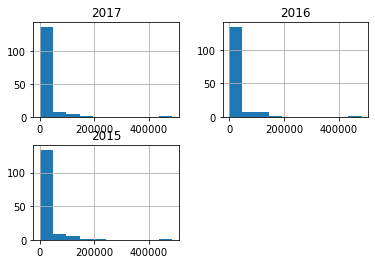

In [44]:
rev_df.hist()
plt.show()